In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
mpl.rcParams['figure.dpi'] = 150
pd.options.mode.chained_assignment = None 

In [61]:
data = pd.read_csv('data/twitter_time.csv')

In [62]:
data

,_id.date,_id.month,_id.day,_id.year,_id.hour,count
0,2020-10-27T22:14:41.000Z,10,27,2020,22,1
1,2020-10-27T22:14:42.000Z,10,27,2020,22,49
2,2020-10-27T22:14:43.000Z,10,27,2020,22,44
3,2020-10-27T22:14:44.000Z,10,27,2020,22,38
4,2020-10-27T22:14:45.000Z,10,27,2020,22,42
...,...,...,...,...,...,...
847787,2020-11-21T06:29:51.000Z,11,21,2020,6,36
847788,2020-11-21T06:29:52.000Z,11,21,2020,6,37
847789,2020-11-21T06:29:53.000Z,11,21,2020,6,29
847790,2020-11-21T06:29:54.000Z,11,21,2020,6,32


In [63]:
mask = (data['_id.date'] >= '2020-11-10T00:00:00.000Z') & (data['_id.date'] <= '2020-11-22T00:00:00.000Z')


In [64]:
data = data.loc[mask]

In [65]:
data['d'] =  pd.to_datetime(data['_id.date'])

In [66]:
data['d'] = data['d'].dt.round('H')

In [67]:
df2 = data.groupby(['d'],as_index=False).agg({'count': 'sum'})

In [68]:
xvalues = df2['d']

In [69]:
yvalues = df2['count']

In [70]:
xvalues

0    2020-11-12 14:00:00+00:00
1    2020-11-12 15:00:00+00:00
2    2020-11-12 21:00:00+00:00
3    2020-11-12 22:00:00+00:00
4    2020-11-12 23:00:00+00:00
                ...           
73   2020-11-20 05:00:00+00:00
74   2020-11-20 06:00:00+00:00
75   2020-11-20 07:00:00+00:00
76   2020-11-21 05:00:00+00:00
77   2020-11-21 06:00:00+00:00
Name: d, Length: 78, dtype: datetime64[ns, UTC]

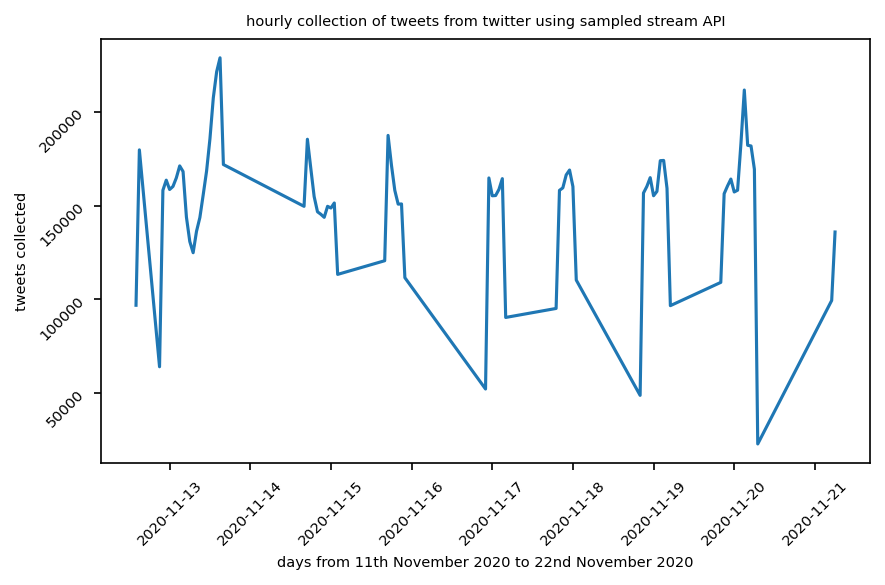

In [73]:
plt.title('hourly collection of tweets from twitter using sampled stream API',fontsize = 7)
plt.xlabel("days from 11th November 2020 to 22nd November 2020",fontsize = 7)
plt.ylabel("tweets collected",fontsize = 7)
plt.plot(xvalues,yvalues)     
plt.xticks(rotation=45,fontsize=7)
plt.yticks(rotation=45,fontsize=7)
plt.tight_layout()
plt.savefig('correct_twitter.png')   # <-- save first
plt.show()